In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#from apyori import apriori
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Cosmetics.csv")

In [3]:
df.head()

,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
0,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
1,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
2,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
3,No,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes
4,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Bag              1000 non-null   object
 1   Blush            1000 non-null   object
 2   Nail Polish      1000 non-null   object
 3   Brushes          1000 non-null   object
 4   Concealer        1000 non-null   object
 5   Eyebrow Pencils  1000 non-null   object
 6   Bronzer          1000 non-null   object
 7   Lip liner        1000 non-null   object
 8   Mascara          1000 non-null   object
 9   Eye shadow       1000 non-null   object
 10  Foundation       1000 non-null   object
 11  Lip Gloss        1000 non-null   object
 12  Lipstick         1000 non-null   object
 13  Eyeliner         1000 non-null   object
dtypes: object(14)
memory usage: 109.5+ KB


In [5]:
df.isna().sum()

Bag                0
Blush              0
Nail Polish        0
Brushes            0
Concealer          0
Eyebrow Pencils    0
Bronzer            0
Lip liner          0
Mascara            0
Eye shadow         0
Foundation         0
Lip Gloss          0
Lipstick           0
Eyeliner           0
dtype: int64

In [6]:
df['Num_items']=(df=='Yes').sum(axis=1)

In [7]:
df.head()

,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner,Num_items
0,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,8
1,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,6
2,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,10
3,No,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,6
4,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,8


C:\Users\hp\AppData\Local\Temp\ipykernel_11472\2207302088.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x=df['Num_items'],order=df['Num_items'].value_counts().index,palette='cool')


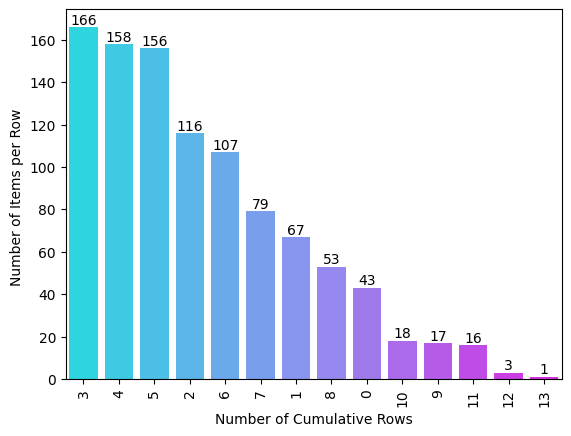

In [8]:
ax=sns.countplot(data=df,x=df['Num_items'],order=df['Num_items'].value_counts().index,palette='cool')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Number of Cumulative Rows')
plt.ylabel('Number of Items per Row ')
plt.xticks(rotation=90)
plt.show()

In [9]:
df['Num_items'].value_counts()

Num_items
3     166
4     158
5     156
2     116
6     107
7      79
1      67
8      53
0      43
10     18
9      17
11     16
12      3
13      1
Name: count, dtype: int64

In [10]:
Df=df.drop('Num_items',axis=1)
Df.head()

,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
0,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
1,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
2,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
3,No,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes
4,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No


In [56]:
item_cols=df.columns.tolist()

num_rows=len(df)
num_cols=len(item_cols)

Records=[]

for i in range(num_rows):
    transaction=[]

    for j in range(num_cols):
        if str(df.values[i,j])=='Yes':
            transaction.append(item_cols[j])
    Records.append(transaction)

In [60]:
Records[:5]

[['Blush',
  'Nail Polish',
  'Brushes',
  'Concealer',
  'Bronzer',
  'Lip liner',
  'Mascara',
  'Eyeliner'],
 ['Nail Polish',
  'Concealer',
  'Bronzer',
  'Lip liner',
  'Foundation',
  'Lip Gloss'],
 ['Blush',
  'Concealer',
  'Eyebrow Pencils',
  'Bronzer',
  'Lip liner',
  'Mascara',
  'Eye shadow',
  'Foundation',
  'Lip Gloss',
  'Lipstick'],
 ['Nail Polish', 'Brushes', 'Concealer', 'Bronzer', 'Foundation', 'Eyeliner'],
 ['Blush',
  'Concealer',
  'Bronzer',
  'Lip liner',
  'Mascara',
  'Eye shadow',
  'Lip Gloss',
  'Lipstick']]

In [48]:
item_cols=list(df.columns)
item_cols

['Bag',
 'Blush',
 'Nail Polish',
 'Brushes',
 'Concealer',
 'Eyebrow Pencils',
 'Bronzer',
 'Lip liner',
 'Mascara',
 'Eye shadow',
 'Foundation',
 'Lip Gloss',
 'Lipstick',
 'Eyeliner',
 'Num_items']

In [14]:
from mlxtend.preprocessing import TransactionEncoder


In [68]:
te=TransactionEncoder()
Cosmetics=te.fit(Records).transform(Records)
Cosmetics=pd.DataFrame(Cosmetics,columns=te.columns_)
Cosmetics

,Bag,Blush,Bronzer,Brushes,Concealer,Eye shadow,Eyebrow Pencils,Eyeliner,Foundation,Lip Gloss,Lip liner,Lipstick,Mascara,Nail Polish
0,False,True,True,True,True,False,False,True,False,False,True,False,True,True
1,False,False,True,False,True,False,False,False,True,True,True,False,False,True
2,False,True,True,False,True,True,True,False,True,True,True,True,True,False
3,False,False,True,True,True,False,False,True,True,False,False,False,False,True
4,False,True,True,False,True,True,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,True,True,False,False,False,False
997,False,True,False,True,True,False,False,True,True,False,True,True,False,True
998,True,True,False,False,True,True,False,True,False,False,False,True,True,False


In [112]:
from mlxtend.frequent_patterns import apriori
frequentitems=apriori(Cosmetics,min_support=0.001,max_len=3,use_colnames=True,verbose=1)
frequentitems

Processing 1092 combinations | Sampling itemset size 3


,support,itemsets
0,0.054,(Bag)
1,0.363,(Blush)
2,0.279,(Bronzer)
3,0.149,(Brushes)
4,0.442,(Concealer)
...,...,...
464,0.068,"(Nail Polish, Mascara, Lip Gloss)"
465,0.036,"(Mascara, Lipstick, Lip liner)"
466,0.027,"(Nail Polish, Lipstick, Lip liner)"
467,0.049,"(Nail Polish, Mascara, Lip liner)"


In [114]:
rules=association_rules(frequentitems,metric='lift',min_threshold=1.0)
rules=rules.sort_values(by='lift',ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
998,"(Bronzer, Nail Polish)",(Brushes),0.125,0.149,0.097,0.776000,5.208054,1.0,0.078375,3.799107,0.923417,0.548023,0.736780,0.713503
1003,(Brushes),"(Bronzer, Nail Polish)",0.149,0.125,0.097,0.651007,5.208054,1.0,0.078375,2.507212,0.949459,0.548023,0.601151,0.713503
1443,(Brushes),"(Nail Polish, Lip liner)",0.149,0.093,0.068,0.456376,4.907267,1.0,0.054143,1.668432,0.935629,0.390805,0.400635,0.593779
1438,"(Nail Polish, Lip liner)",(Brushes),0.093,0.149,0.068,0.731183,4.907267,1.0,0.054143,3.165720,0.877862,0.390805,0.684116,0.593779
326,"(Nail Polish, Bag)",(Brushes),0.028,0.149,0.020,0.714286,4.793864,1.0,0.015828,2.978500,0.814198,0.127389,0.664261,0.424257


In [90]:
Output=round(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']],3)  # rounding off number by 2 digit after decimal 

Output.head(20)

,antecedents,consequents,support,confidence,lift
998,"(Bronzer, Nail Polish)",(Brushes),0.097,0.776,5.208
1003,(Brushes),"(Bronzer, Nail Polish)",0.097,0.651,5.208
1443,(Brushes),"(Nail Polish, Lip liner)",0.068,0.456,4.907
1438,"(Nail Polish, Lip liner)",(Brushes),0.068,0.731,4.907
326,"(Nail Polish, Bag)",(Brushes),0.020,0.714,4.794
331,(Brushes),"(Nail Polish, Bag)",0.020,0.134,4.794
1360,"(Nail Polish, Eyebrow Pencils)",(Brushes),0.011,0.688,4.614
1365,(Brushes),"(Nail Polish, Eyebrow Pencils)",0.011,0.074,4.614
444,"(Bag, Lipstick)",(Eyebrow Pencils),0.003,0.188,4.464
449,(Eyebrow Pencils),"(Bag, Lipstick)",0.003,0.071,4.464


In [94]:
len(Output)

2052

In [100]:
targeted_rules = Output[Output['consequents'] == {'Eyeliner'}].copy()
targeted_rules

,antecedents,consequents,support,confidence,lift
430,"(Bag, Eyebrow Pencils)",(Eyeliner),0.004,0.800,1.751
478,"(Bag, Lipstick)",(Eyeliner),0.012,0.750,1.641
1560,"(Lipstick, Concealer)",(Eyeliner),0.103,0.725,1.587
1248,"(Concealer, Brushes)",(Eyeliner),0.063,0.685,1.498
1017,"(Bronzer, Concealer)",(Eyeliner),0.119,0.680,1.488
...,...,...,...,...,...
1899,"(Foundation, Lipstick)",(Eyeliner),0.078,0.467,1.022
490,"(Nail Polish, Bag)",(Eyeliner),0.013,0.464,1.016
121,(Lip Gloss),(Eyeliner),0.227,0.463,1.014
1366,"(Foundation, Brushes)",(Eyeliner),0.034,0.459,1.005


In [106]:
targeted_rules = Output[Output['consequents'] == {'Brushes'}].copy().head(20)
targeted_rules

,antecedents,consequents,support,confidence,lift
998,"(Bronzer, Nail Polish)",(Brushes),0.097,0.776,5.208
1438,"(Nail Polish, Lip liner)",(Brushes),0.068,0.731,4.907
326,"(Nail Polish, Bag)",(Brushes),0.020,0.714,4.794
1360,"(Nail Polish, Eyebrow Pencils)",(Brushes),0.011,0.688,4.614
1456,"(Nail Polish, Mascara)",(Brushes),0.083,0.619,4.157
1320,"(Nail Polish, Eye shadow)",(Brushes),0.081,0.618,4.150
1276,"(Nail Polish, Concealer)",(Brushes),0.092,0.617,4.144
1388,"(Nail Polish, Eyeliner)",(Brushes),0.078,0.582,3.907
692,"(Nail Polish, Blush)",(Brushes),0.070,0.569,3.820
1450,"(Nail Polish, Lipstick)",(Brushes),0.049,0.551,3.695


In [108]:
filtered_rules = targeted_rules[(targeted_rules['confidence'] > 0.1) &
                                (targeted_rules['lift'] > 3.00)]
filtered_rules

,antecedents,consequents,support,confidence,lift
998,"(Bronzer, Nail Polish)",(Brushes),0.097,0.776,5.208
1438,"(Nail Polish, Lip liner)",(Brushes),0.068,0.731,4.907
326,"(Nail Polish, Bag)",(Brushes),0.020,0.714,4.794
1360,"(Nail Polish, Eyebrow Pencils)",(Brushes),0.011,0.688,4.614
1456,"(Nail Polish, Mascara)",(Brushes),0.083,0.619,4.157
1320,"(Nail Polish, Eye shadow)",(Brushes),0.081,0.618,4.150
1276,"(Nail Polish, Concealer)",(Brushes),0.092,0.617,4.144
1388,"(Nail Polish, Eyeliner)",(Brushes),0.078,0.582,3.907
692,"(Nail Polish, Blush)",(Brushes),0.070,0.569,3.820
1450,"(Nail Polish, Lipstick)",(Brushes),0.049,0.551,3.695
